## Install all the nesessary libraries

In [1]:
%pip -q install numpy pandas matplotlib scikit-learn 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import All the Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

## Calculate prediction errors using Root Mean Squared Error

In [8]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

## Read the dataset

In [4]:
# Path of the file to read
csv_file_path = 'multidimentional_dataset.csv'

# Read the file into a DataFrame
student_data = pd.read_csv(csv_file_path)

# Print summary statistics of the dataset
print(student_data.describe())

# Extract academic performance (feature) and time to first job (target)
academic_performance = student_data['x1'].values.reshape((-1, 1))  # e.g., GPA or exam score
attendance = student_data['x2'].values.reshape((-1, 1))  # Percentage of lectures and practical sessions attended
months_to_first_job = student_data['y'].values  # months to first job after graduation

               x1          x2           y
count  120.000000  120.000000  120.000000
mean     4.206667   75.950000    9.508333
std      0.460495   15.752738    5.641973
min      3.200000   20.000000    1.000000
25%      3.800000   65.000000    5.000000
50%      4.200000   79.500000    8.000000
75%      4.600000   88.000000   15.000000
max      5.000000  100.000000   20.000000


## Train the model using Linear Regression

The coefficient of determination shows how close the model values ​​are to the actual values. A higher coefficient value indicates a better fit, i.e. the model can better explain the variation in output given different inputs.

A coefficient value of 1 is a perfect fit, since the predicted and actual output values ​​exactly match.

In [5]:
# Fit linear regression model
X = np.column_stack((academic_performance, attendance))
model = LinearRegression().fit(X, months_to_first_job)
coefficient_of_determination = model.score(X, months_to_first_job)
coef_X1 = model.coef_[0]
coef_X2 = model.coef_[1]
print('coefficient of determination:', coefficient_of_determination)
print('intercept:', model.intercept_)
print('slope:', [coef_X1, coef_X2])

# Predict the response
predicted_months = model.predict(X)
print('predicted response:', predicted_months, sep='\n')

coefficient of determination: 0.6862175991039763
intercept: 48.56655954244423
slope: [-7.767749079237714, -0.0840275850223952]
predicted response:
[ 1.32505564  2.9421064  17.36856134 10.06008246  4.13901924 14.11201217
  5.94465181  7.93886619  9.95360722  9.82852635  6.09218033 10.73230314
 17.59819644  9.45136272  7.14156464  6.78492766  4.97929509 16.75792059
  2.33338666  9.30383419  7.66625679 15.56100776 10.3532185   2.52196848
 14.42759587  6.04920603 15.6245087  10.16463669  5.88115086 12.81054511
  5.52451388 15.14086983  3.82343554 12.68354322  4.30707441 17.34611368
  9.8079997  10.77335642  6.91000853 15.39295259 10.24866427  5.96517845
 11.7181865   3.90746312  7.70731008  5.69256905 12.72651752  7.77081102
 15.45645353  6.8054543   3.38277097 16.00167232  9.55591695  7.49820162
 15.72906293 10.0806091   2.69002365 13.83940277  6.13323362 15.28839836
  7.60275585 12.64248994  5.60854147 16.86247482  3.73940795 13.41926484
  4.22304682 14.86826043  9.72397212 10.52127367  

The coefficient of determination is close to 1. This is tolerable value, so the model is trained good.

## Show the representation of the trained model line

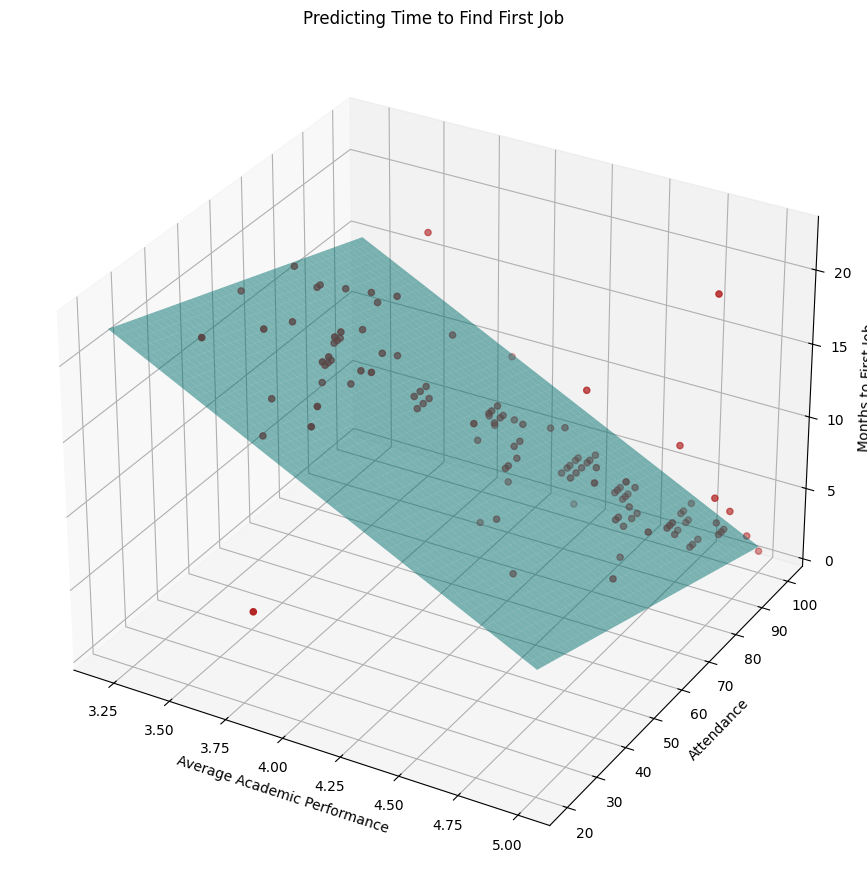

In [6]:
# Create a plot
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], months_to_first_job, color='firebrick')

x1_surf, x2_surf = np.meshgrid(np.linspace(academic_performance.min(), academic_performance.max(), 50),
                                np.linspace(attendance.min(), attendance.max(), 50))
y_surf = model.intercept_ + coef_X1 * x1_surf + coef_X2 * x2_surf
ax.plot_surface(x1_surf, x2_surf, y_surf, color='cyan', alpha=0.5, label='Regression Plane')

ax.set_xlabel('Average Academic Performance')
ax.set_ylabel('Attendance')
ax.set_zlabel('Months to First Job')
ax.set_title('Predicting Time to Find First Job')

plt.show()


## Calculate the Mean Error

In [15]:
# Calculate RMSE for each data point
errors = np.zeros((len(months_to_first_job), 1))


for i in range(len(months_to_first_job)):
    errors[i][0] = rmse(months_to_first_job[i], predicted_months[i])

print("Mean Error: ", np.round(errors.mean(),2), "months")

Mean Error:  2.04 months


## Predict new values

In [38]:
# Predict time to first job for new academic performance values
new_academic_performance = np.random.uniform(3.2, 5.0, 5).reshape((-1, 1))
new_attendance = np.random.uniform(60, 100, 5).reshape((-1, 1))
print("Average Grades: \n", new_academic_performance)
print("Attendance: \n", new_attendance)

X = np.column_stack((new_academic_performance, new_attendance))
new_predicted_months = model.predict(X)
print("Months to First Job: ", new_predicted_months)

Average Grades: 
 [[4.70848678]
 [4.83389185]
 [3.57083992]
 [4.94315661]
 [4.36747037]]
Attendance: 
 [[95.35107615]
 [88.42214805]
 [87.97592471]
 [92.4404075 ]
 [79.71151002]]
Months to First Job:  [ 3.98009502  3.58820099 13.43676659  2.40181517  7.94317991]
